In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from scipy.interpolate import Rbf, griddata
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D

try:
    from google.colab import drive
    IN_COLAB = True
except:
    IN_COLAB = False

In [2]:
%matplotlib inline

In [3]:
if IN_COLAB:
    # Mount drive
    drive.mount("gdrive")
    # Change working dir
    os.chdir('''/content/gdrive/My Drive/Investigacion/Investigacion_ClaudioOrtega_JGLL/
                Articulo_Smart_Irrigation_System/VERSION_MIT_SCALE/Interpolation+FIS/''')

In [4]:
def surfaces_plot(Xi, Yi, Zi, Z_real, dims=3):
    if dims == 3:
        fig = plt.figure(figsize=(15,10))

        #===============
        #  First subplot
        #===============
        # set up the axes for the first plot
        ax = fig.add_subplot(1, 2, 1, projection='3d')

        # plot a 3D surface like in the example mplot3d/surface3d_demo
        surf = ax.plot_surface(Xi, Yi, Zi, cmap=cm.viridis_r, linewidth=0)
        ax.set_title('Interpolated Soil Moisture Values', fontsize=20)


        #===============
        # Second subplot
        #===============
        # set up the axes for the second plot
        ax = fig.add_subplot(1, 2, 2, projection='3d')
        ax.set_title('Real Soil Moisture Values', fontsize=20)

        # plot a 3D surface like in the example mplot3d/surface3d_demo
        surf = ax.plot_surface(Xi, Yi, Z_real, cmap=cm.viridis_r, linewidth=0)
    
    elif dims == 2:
        fig = plt.figure(figsize=(15,5))

        #===============
        #  First subplot
        #===============
        # set up the axes for the first plot
        ax1 = fig.add_subplot(1, 2, 1)

        # plot a 2D surface
        colormesh1 = plt.pcolormesh(Xi,Yi, Zi, cmap=cm.viridis_r)
        ax1.set_title('Interpolated Soil Moisture Values')
        ax1.set_xticks(range(8))

        #===============
        # Second subplot
        #===============
        # set up the axes for the second plot
        ax2 = fig.add_subplot(1, 2, 2)

        # plot a 2D surface
        colormesh2 = plt.pcolormesh(Xi,Yi, Z_real.reshape(8,8), cmap=cm.viridis_r)
        ax2.set_title('Real Soil Moisture Values')
        ax2.set_xticks(range(8));

        #Add colorbar to the figure
        plt.colorbar(colormesh2, ax=[ax1,ax2]);
    else:
        print('valid dims are 2 or 3')

    return fig

In [5]:
def mape(y, y_pred):
    '''returns mean absolute percentage error for given arrays'''
    return np.mean(np.abs((y - y_pred) / y)) * 100

In [6]:
def rmse(y, y_pred):
    '''returns root mean squared error for given arrays'''
    return np.sqrt(np.mean(np.power((y - y_pred), 2)))

In [7]:
def get_score_color(score):
    if score < 40:
        return 'yellow'
    elif score < 60:
        return 'green'
    else:
        return 'blue'

In [68]:
def dashboard_v2(Xi, Yi, Zi, scores, Z_temp, weather):

    import matplotlib.gridspec as gridspec
    import matplotlib.image as mpimg
    from PIL import Image, ImageEnhance

    fig = plt.figure(figsize=(20,15))

    #----------Soil Moisture heatmap-----------------
    ax1 = plt.subplot2grid((3, 4), (0, 0), colspan=2, rowspan=2)
    colormesh1 = plt.pcolormesh(Xi,Yi, Zi, cmap=cm.viridis_r)
    cbar = plt.colorbar(colormesh1)
    cbar.ax.tick_params(labelsize=20)
    ax1.set_title('Park Humidity by Quadrant', fontsize=25)
    ax1.set_xticks(range(8))
    for ticks in ax1.xaxis.get_major_ticks():
        ticks.label.set_fontsize(20)
    ax1.set_yticklabels(['',1,2,3,4,5,6,7])
    for ticks in ax1.yaxis.get_major_ticks():
        ticks.label.set_fontsize(20)
    ax1.plot(np.ones(8)*3.5,range(8), color='k')
    ax1.plot(range(8),np.ones(8)*3.5, color='k')
    
    ax1.text(2.8,3.1,'3rd',fontsize=30, color='w')
    ax1.text(6.2,3.1,'2nd',fontsize=30, color='w')
    ax1.text(2.8,6.6,'4th', fontsize=30, color='w')
    ax1.text(6.2,6.6,'1st', fontsize=30, color='w')

    #----------Weather Forecast--------------------
    ax2 = plt.subplot2grid((3, 4), (0,2), colspan=2, rowspan=1)
    img = Image.open('input/weather_forecast/day{}.png'.format(weather))
    img = img.resize((700,300))
    saturation = ImageEnhance.Color(img)
    img = saturation.enhance(6)
    contrast = ImageEnhance.Contrast(img)
    img = contrast.enhance(8)
    brightness = ImageEnhance.Brightness(img)
    img = brightness.enhance(1.5)
    imgplot = plt.imshow(img)
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.set_title('Area Weather Forecast', fontsize=25)
    ax2.set_adjustable('box')
    ax2.set_anchor('SW')

    #------------Temperature Heatmap-----------------
    ax3 = plt.subplot2grid((3, 4), (1, 2), colspan=2, rowspan=1)
    colormesh_temp = plt.pcolormesh(Z_temp, cmap=cm.YlOrRd, vmin=10, vmax=33)
    cbar_temp = plt.colorbar(colormesh_temp, pad=0.051, fraction=0.035)
    cbar_temp.ax.tick_params(labelsize=20)  
    cbar_temp.set_ticks(range(0,33,4))
    ax3.set_title('Park Temperature by Quadrant', fontsize=25)
    ax3.set_xticks([])
    ax3.set_yticks([])
    labels = Z_temp.ravel().round()
    
    ax3.text(0.4,0.4,'{}°C'.format(labels[0]),fontsize=20)
    ax3.text(1.4,0.4,'{}°C'.format(labels[1]),fontsize=20)
    ax3.text(0.4,1.4,'{}°C'.format(labels[2]), fontsize=20)
    ax3.text(1.4,1.4,'{}°C'.format(labels[3]), fontsize=20)
    
    ax3.text(0.85,0.85,'3rd',fontsize=20, color='k')
    ax3.text(1.85,0.85,'2nd',fontsize=20, color='k')
    ax3.text(0.85,1.85,'4th', fontsize=20, color='k')
    ax3.text(1.85,1.85,'1st', fontsize=20, color='k')
    
    for pos in np.arange(0.25,2,0.25):
        if pos == 1:
            alpha = 1
        else:
            alpha= 0.2
        ax3.plot(np.ones(3)*pos,range(3), color='k', alpha=alpha)
        ax3.plot(range(3), np.ones(3)*pos, color='k', alpha=alpha)

    #-----------Fuzzy Scores by Segment-------------
    ax4 = plt.subplot2grid((3, 4), (2, 0), colspan=4)
    x = [1,2,3,4]
    y = scores.round().values.tolist()
    colors = scores.apply(get_score_color).values.tolist()
    xx = [0,1,2,3,4,5] # X arrays for thresholds
    threshold1 = [40,40,40,40,40,40] # Y arrays for threshold1
    threshold2 = [60,60,60,60,60,60] # Y arrays for threshold2
    plt.bar(x,y, color=colors)
    plt.plot(xx,threshold1, color='k')
    plt.plot(xx,threshold2, color='k')
    ax4.set_xticks(x)
    ax4.set_yticks(range(0,101,10))
    for ticks in ax4.xaxis.get_major_ticks():
        ticks.label.set_fontsize(20)
    ax1.set_yticklabels(['',1,2,3,4,5,6,7])
    for ticks in ax4.yaxis.get_major_ticks():
        ticks.label.set_fontsize(20)
    ax4.set_title('FIS Score - Recomendation by Park Quadrant', fontsize=25)
    ax4.text(0.85,5,y[0],fontsize=20)
    ax4.text(1.85,5,y[1],fontsize=20)
    ax4.text(2.85,5,y[2], fontsize=20)
    ax4.text(3.925,5,y[3], fontsize=20)
    ax4.set_xlabel('Quadrant', fontsize=25);
    ax4.set_ylabel('Score', fontsize=25);
    #--------------------------------

    plt.tight_layout()
    plt.savefig('output/dashboard_v2.png')
    
    return fig

In [42]:
def get_epsilon(x, y, z, z_real):
    Yi, Xi = np.mgrid[:7:8j, 0:7:8j] #Grid positions (x, y coordinates)
    yi, xi = Yi.ravel(), Xi.ravel()

    #Arrays to store epsilon and error values 
    mape_array = np.array([])
    rmse_array = np.array([])
    epsilon_array = np.array([])

    #Exhaustive search for best epsilon parameter in RBF interpolation 
    for eps in np.linspace(0.01,5,10000):
        rbfi = Rbf(x, y, z, function='multiquadric', epsilon=eps) #radial basis function interpolator instance
        zi = rbfi(xi, yi) #array of interpolated values using the RBF

        #Storage of epsilon and error values
        mape_array = np.append(mape_array, mape(z_real, zi))
        rmse_array = np.append(rmse_array, rmse(z_real, zi))
        epsilon_array = np.append(epsilon_array, eps)

    best_epsilon = epsilon_array[rmse_array.argmin()]

    return best_epsilon

In [21]:
def pretty_print(df):
    return display( HTML( df.to_html().replace("\\n","<br>") ) )

In [22]:
# Load data
hum_data = pd.read_csv('input/humidity.csv')
temp_dash = pd.read_csv('input/temp_cuadrantes_x_dia.csv')
score_dash = pd.read_csv('input/score_cuadrantes_x_dia.csv')

# dataframe to store errors
error_table = pd.DataFrame(index=['rmse', 'mape'], columns=hum_data.columns)

In [23]:
# Get best episilon for each day
epsilons = []

for i, day in enumerate(hum_data.columns, start=1):
    z_real = hum_data[day] #Soil moisture values for sample
    
    stratified_sample = pd.read_csv('output/daily_stratified_sample/stratified_sample_day{}.csv'.format(i), header=None)
    stratified_sample_array = stratified_sample.values #array of stratified sample values
    
    x = stratified_sample_array[:,0] #X position for stratified sample
    y = stratified_sample_array[:,1] #Y position for stratified sample
    z = stratified_sample_array[:,2] #Soil moisture values for stratified sample

    #Exhaustive search for best epsilon parameter in RBF interpolation 
    best_epsilon = get_epsilon(x, y, z, z_real)
    epsilons.append(best_epsilon)

In [24]:
# Plot figures and calculate errors
nearest_error = []
linear_error = []
cubic_error = []
rbf_error = []

for i, day in enumerate(hum_data.columns, start=1):
    grid_y, grid_x = np.mgrid[:7:8j, 0:7:8j] #Grid positions (x, y coordinates)
    yi, xi = grid_y.ravel(), grid_x.ravel()
    z_real = hum_data[day] #Soil moisture values for sample
    
    stratified_sample = pd.read_csv('output/daily_stratified_sample/stratified_sample_day{}.csv'.format(i), header=None)
    stratified_sample_array = stratified_sample.values #array of stratified sample values
    
    x = stratified_sample_array[:,0] #X position for stratified sample
    y = stratified_sample_array[:,1] #Y position for stratified sample
    z = stratified_sample_array[:,2] #Soil moisture values for stratified sample
    
    points = stratified_sample_array[:,:2] #X, Y position for stratified sample
    values = stratified_sample_array[:,2] #Soil moisture values for stratified sample

    z0 = griddata(points, values, (grid_y, grid_x), method='nearest').ravel()
    z1 = griddata(points, values, (grid_y, grid_x), method='linear', fill_value=np.max(values)).ravel()
    z2 = griddata(points, values, (grid_y, grid_x), method='cubic', fill_value=np.max(values)).ravel()

    #Exhaustive search for best epsilon parameter in RBF interpolation 
    rbfi = Rbf(x, y, z, function='multiquadric', epsilon=epsilons[i-1]) #RBF interpolator instance with best epsilon
    zi = rbfi(xi, yi) #Array of interpolated values using the RBF
    
    #Store error values for each method
    linear_error.append(mape(z_real, z1))
    linear_error.append(rmse(z_real, z1))
    
    nearest_error.append(mape(z_real, z0))
    nearest_error.append(rmse(z_real, z0))

    cubic_error.append(mape(z_real, z2))
    cubic_error.append(rmse(z_real, z2))
    
    rbf_error.append(mape(z_real, zi))
    rbf_error.append(rmse(z_real, zi))
    
    #Arrays of soil moisture values in grid form for surface plots
    Z_real = z_real.values.reshape(8,8) 
    Zi = zi.reshape(8,8)
    
    ##Generate plots
    #surfaces_plot(grid_x, grid_y, Zi, Z_real, dims=2)
    #plt.suptitle(day, fontsize=20)
    #plt.savefig('output/images/2d/surface_{}.png'.format(day), dpi=300)
    #surfaces_plot(grid_x, grid_y, Zi, Z_real, dims=3)
    #plt.savefig('output/images/3d/surface_{}.png'.format(day), dpi=300)
    #dashboard_v2(grid_x, grid_y, Zi, score_dash.loc[:,day], temp_dash.loc[:,day].values.reshape(2,2))
    #plt.savefig('output/images/dashboard/surface_{}.png'.format(day), dpi=300)

In [25]:
# Organize error values in a dataframe
arrays = [['Monday\n{}'.format(round(epsilons[0],4)), 'Monday\n{}'.format(round(epsilons[0],4)),
           'Tuesday\n{}'.format(round(epsilons[1],4)), 'Tuesday\n{}'.format(round(epsilons[1],4)),
           'Wednesday\n{}'.format(round(epsilons[2],4)), 'Wednesday\n{}'.format(round(epsilons[2],4)),
           'Thursday\n{}'.format(round(epsilons[3],4)), 'Thursday\n{}'.format(round(epsilons[3],4)),
           'Friday\n{}'.format(round(epsilons[4],4)), 'Friday\n{}'.format(round(epsilons[4],4)),
           'Saturday\n{}'.format(round(epsilons[5],4)), 'Saturday\n{}'.format(round(epsilons[5],4)),
           'Sunday\n{}'.format(round(epsilons[6],4)), 'Sunday\n{}'.format(round(epsilons[6],4))],
          ['MAPE', 'RMSE', 'MAPE', 'RMSE', 'MAPE', 'RMSE', 'MAPE', 'RMSE', 'MAPE', 'RMSE', 'MAPE', 'RMSE', 'MAPE', 'RMSE']]

tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples, names=['Day / epsilon', 'Metric'])
df = pd.DataFrame(data=[], index=index, columns=['RBF', 'Linear', 'Nearest', 'Cubic'])
df.loc[:,'Nearest'] = nearest_error
df.loc[:,'Linear'] = linear_error
df.loc[:,'Cubic'] = cubic_error
df.loc[:,'RBF'] = rbf_error

In [26]:
pretty_print(df.round(4))

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

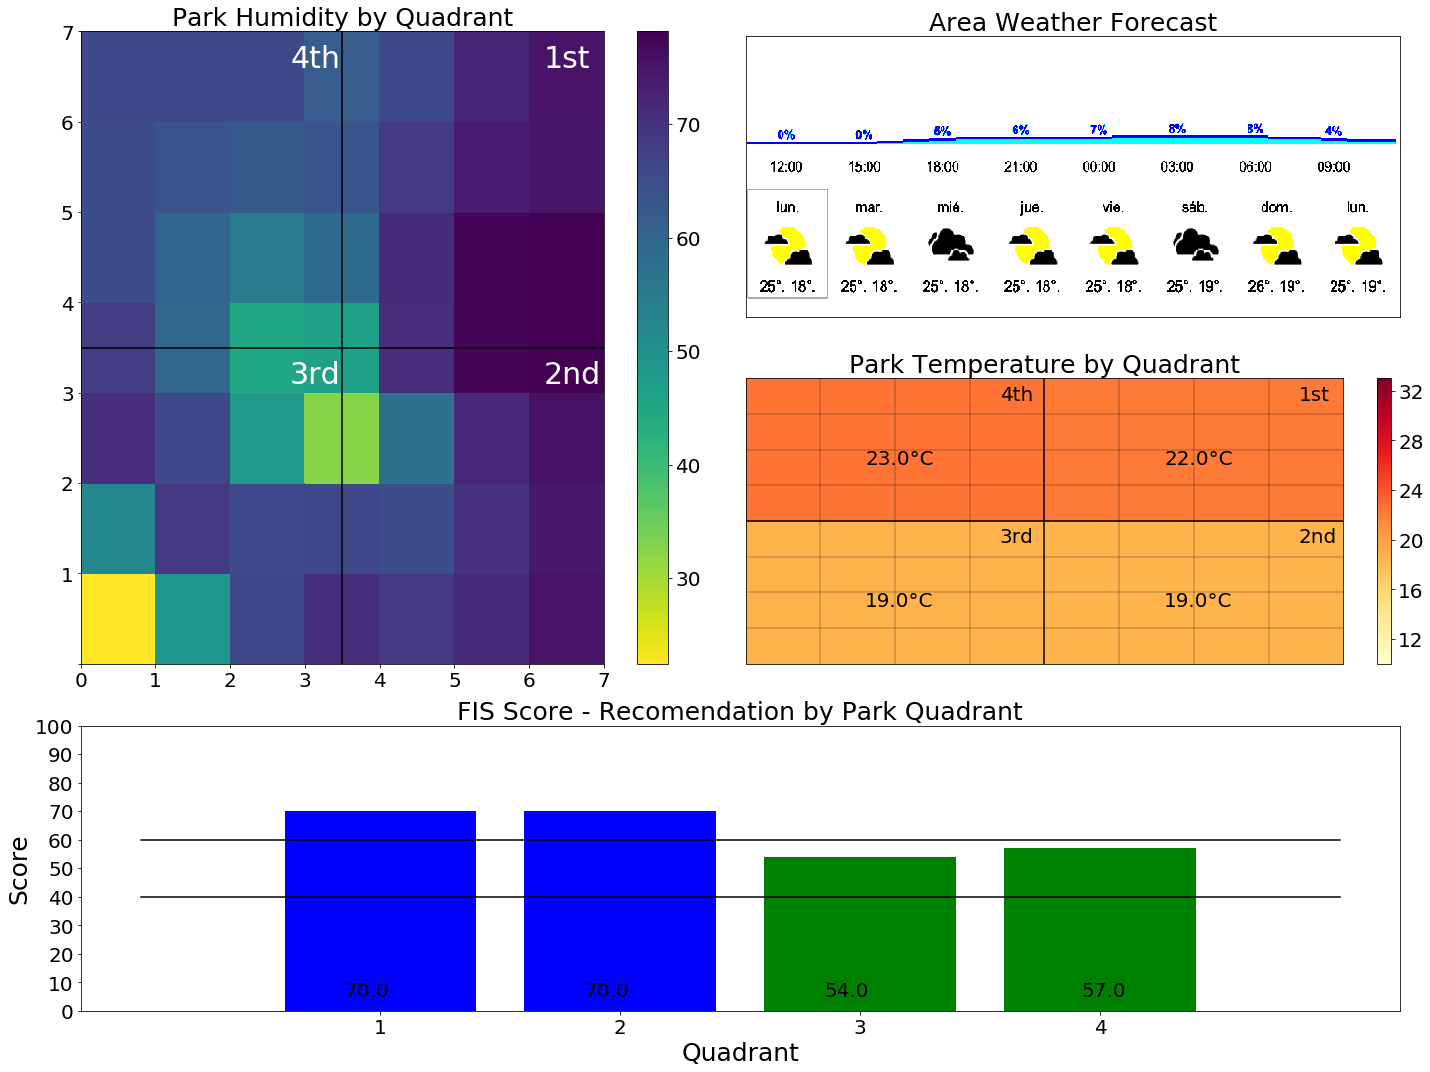

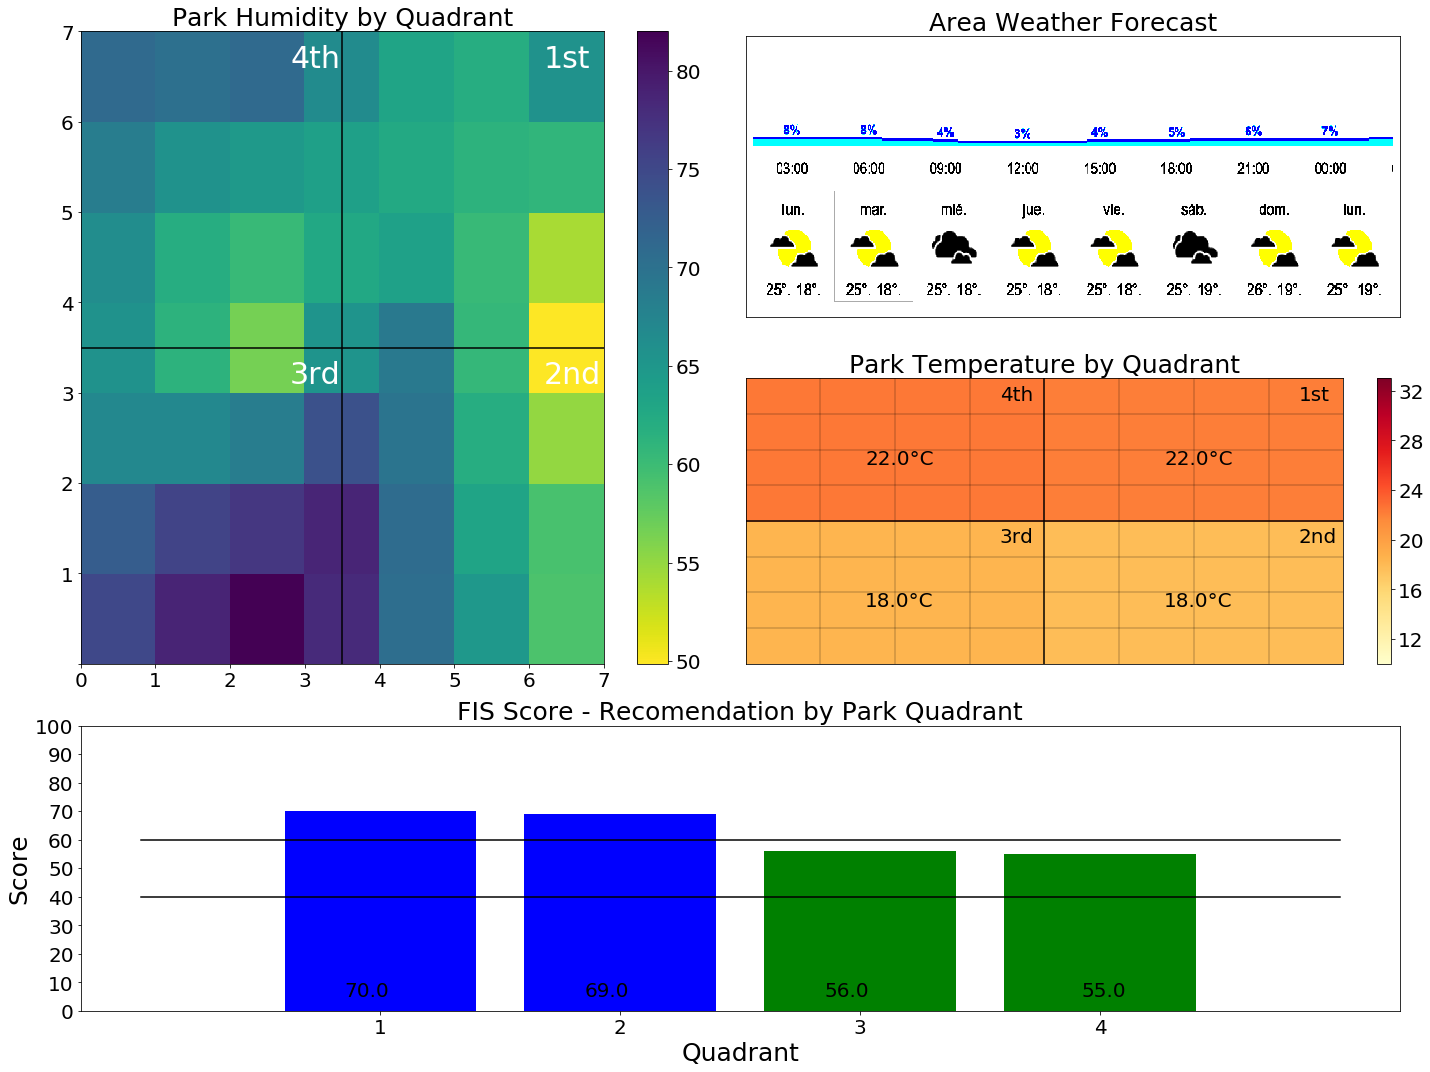

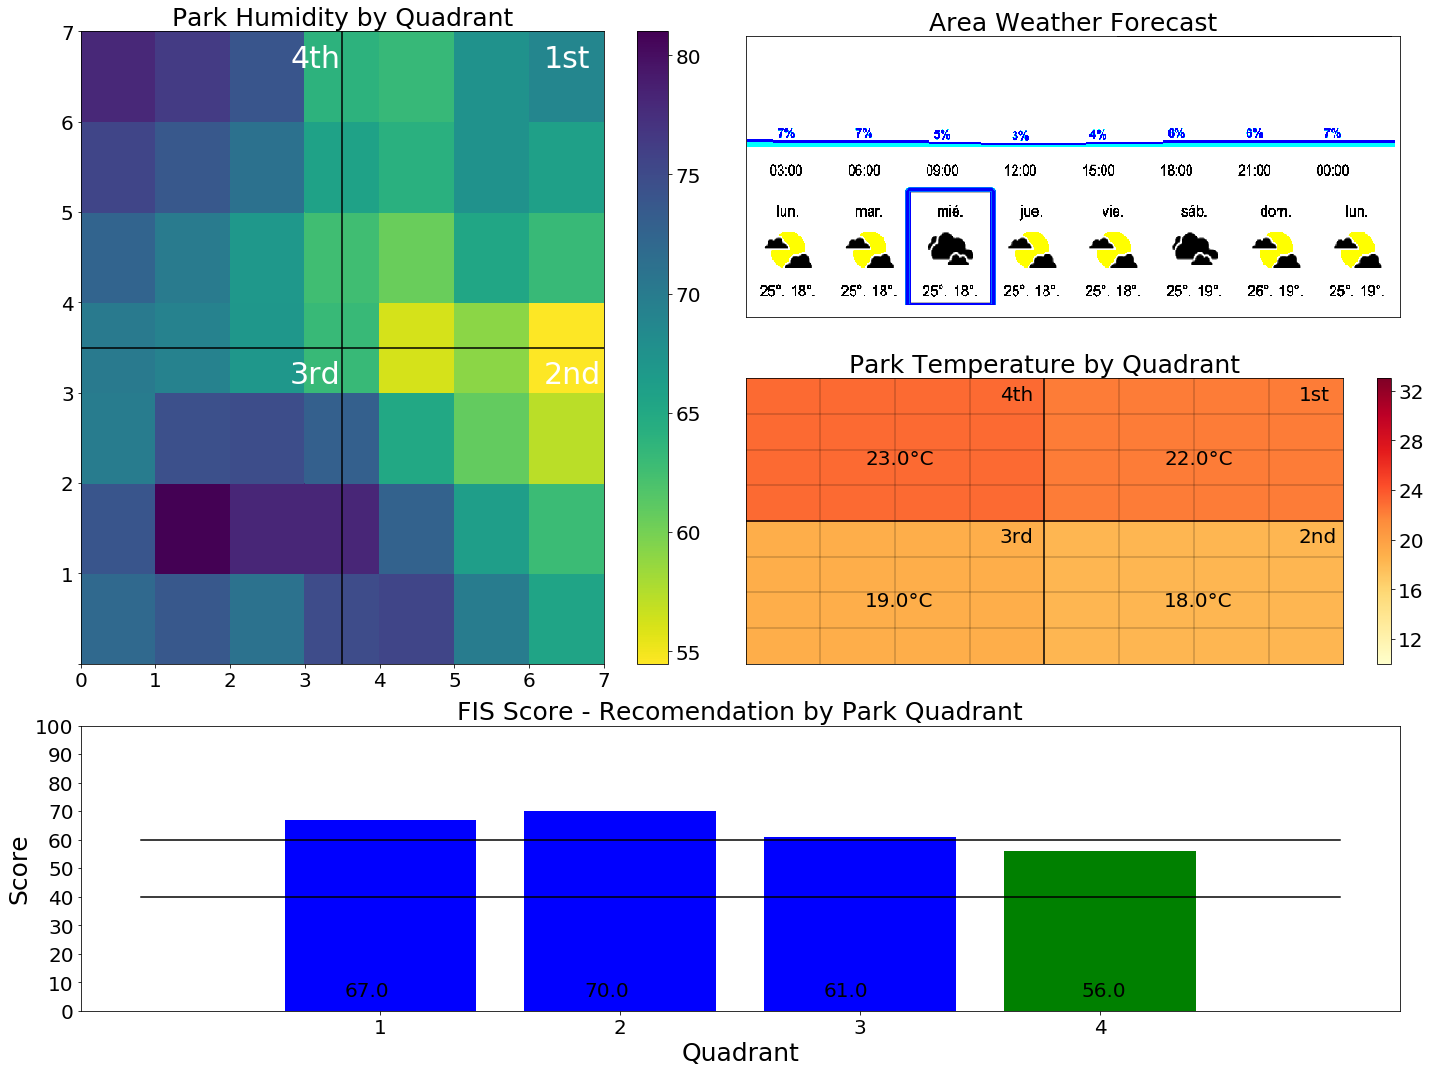

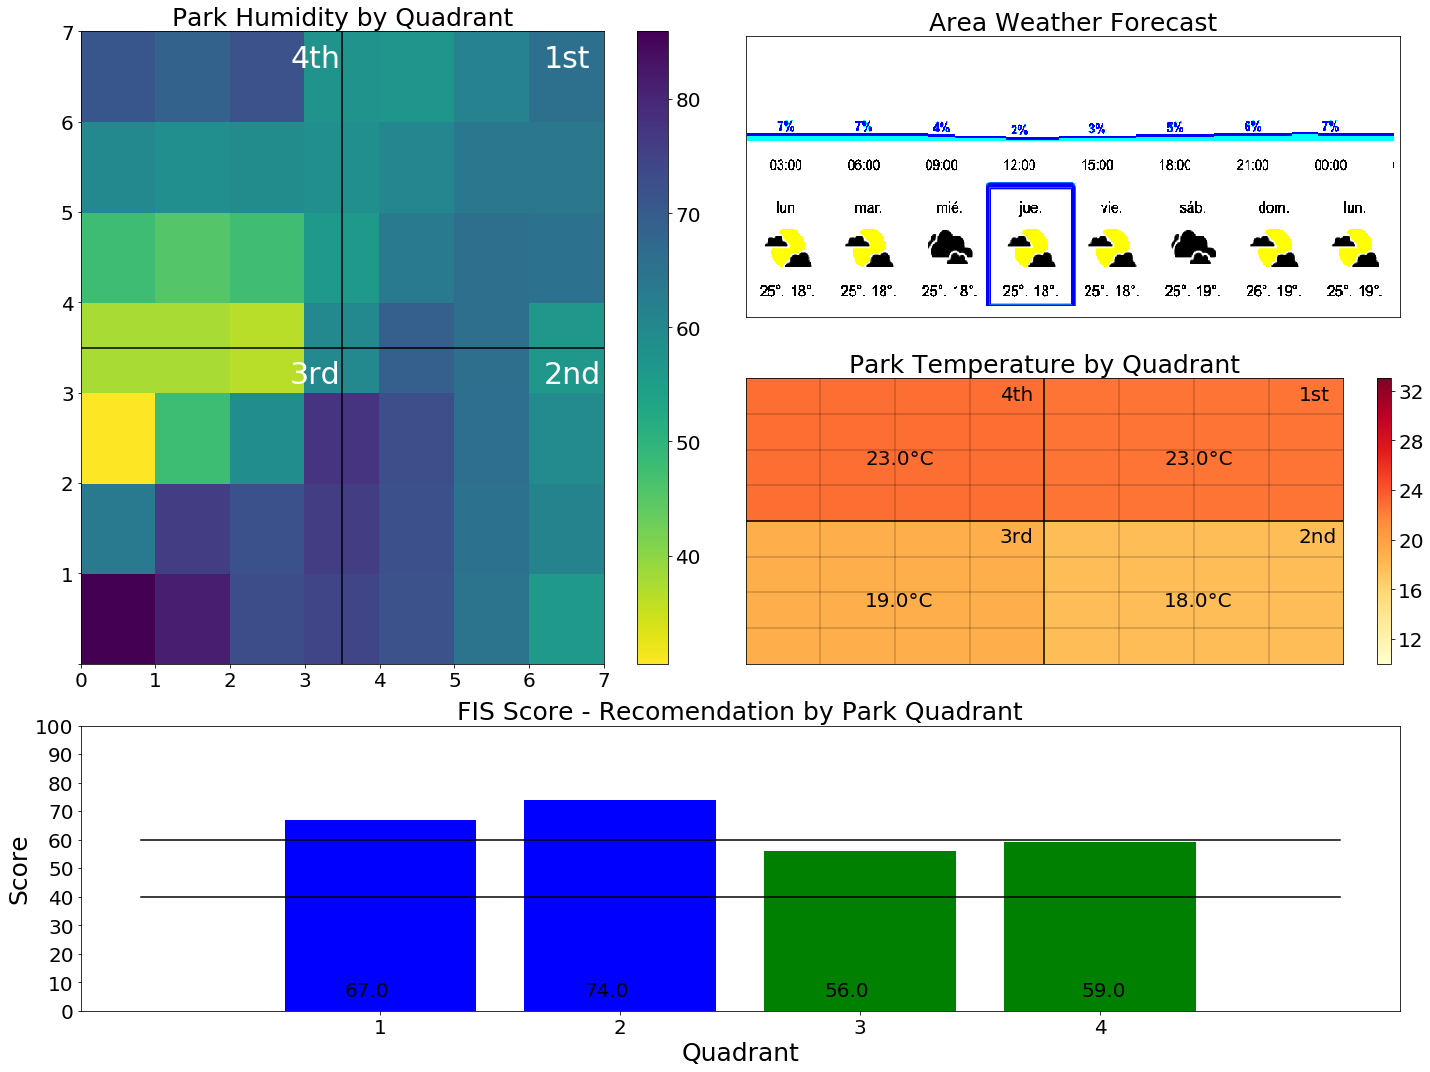

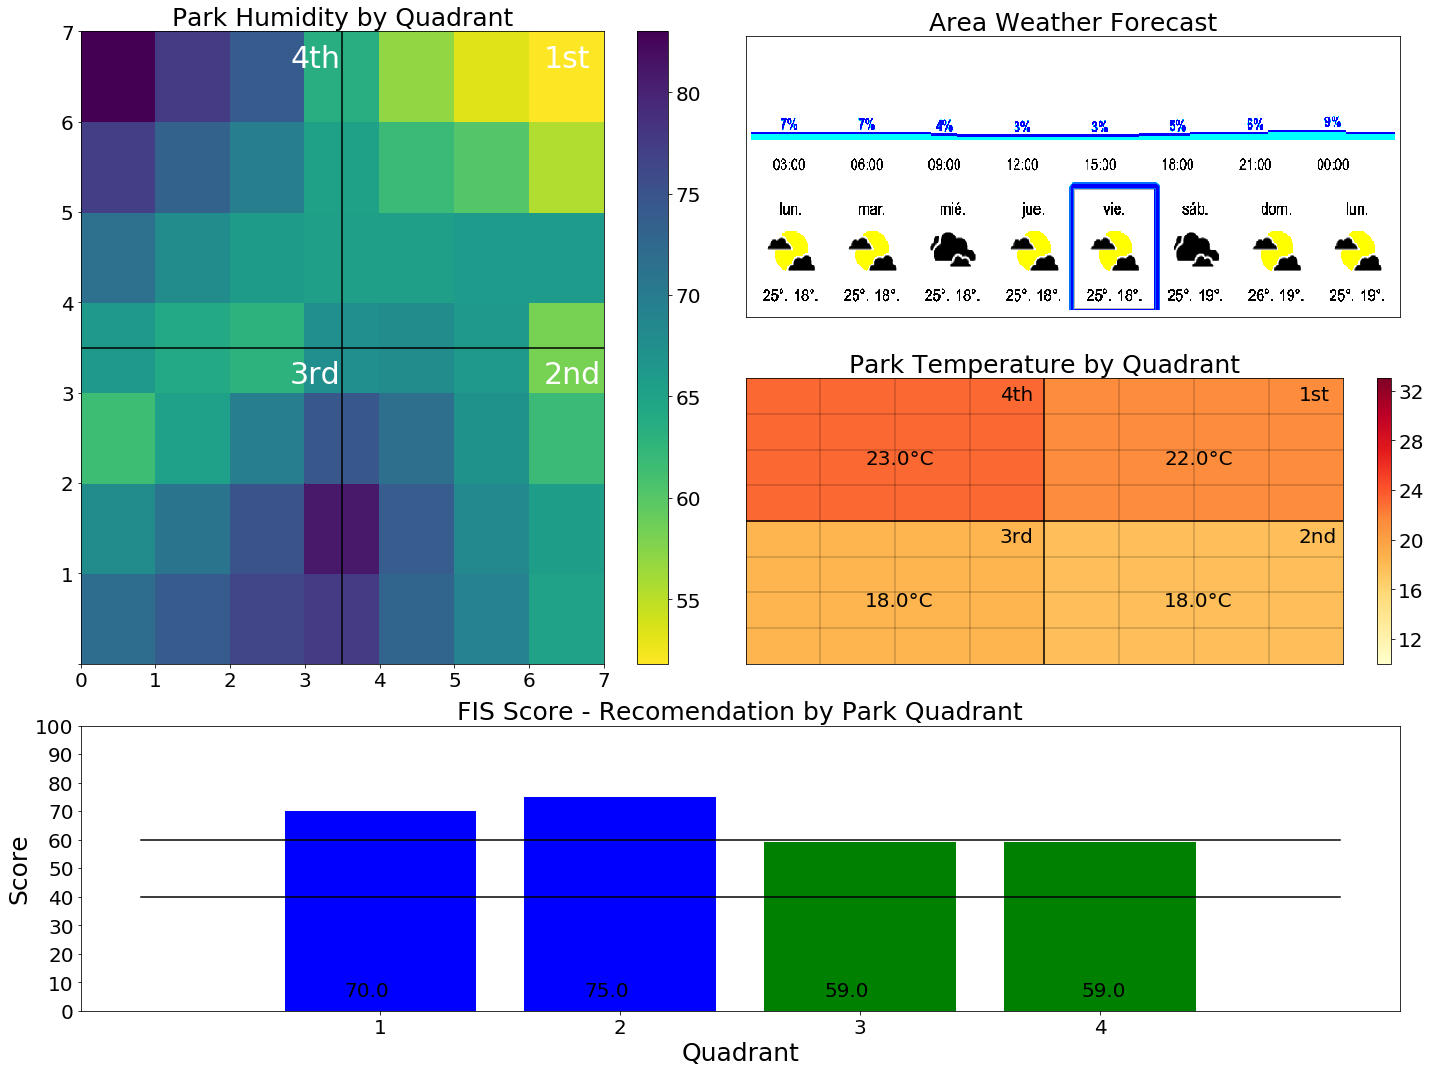

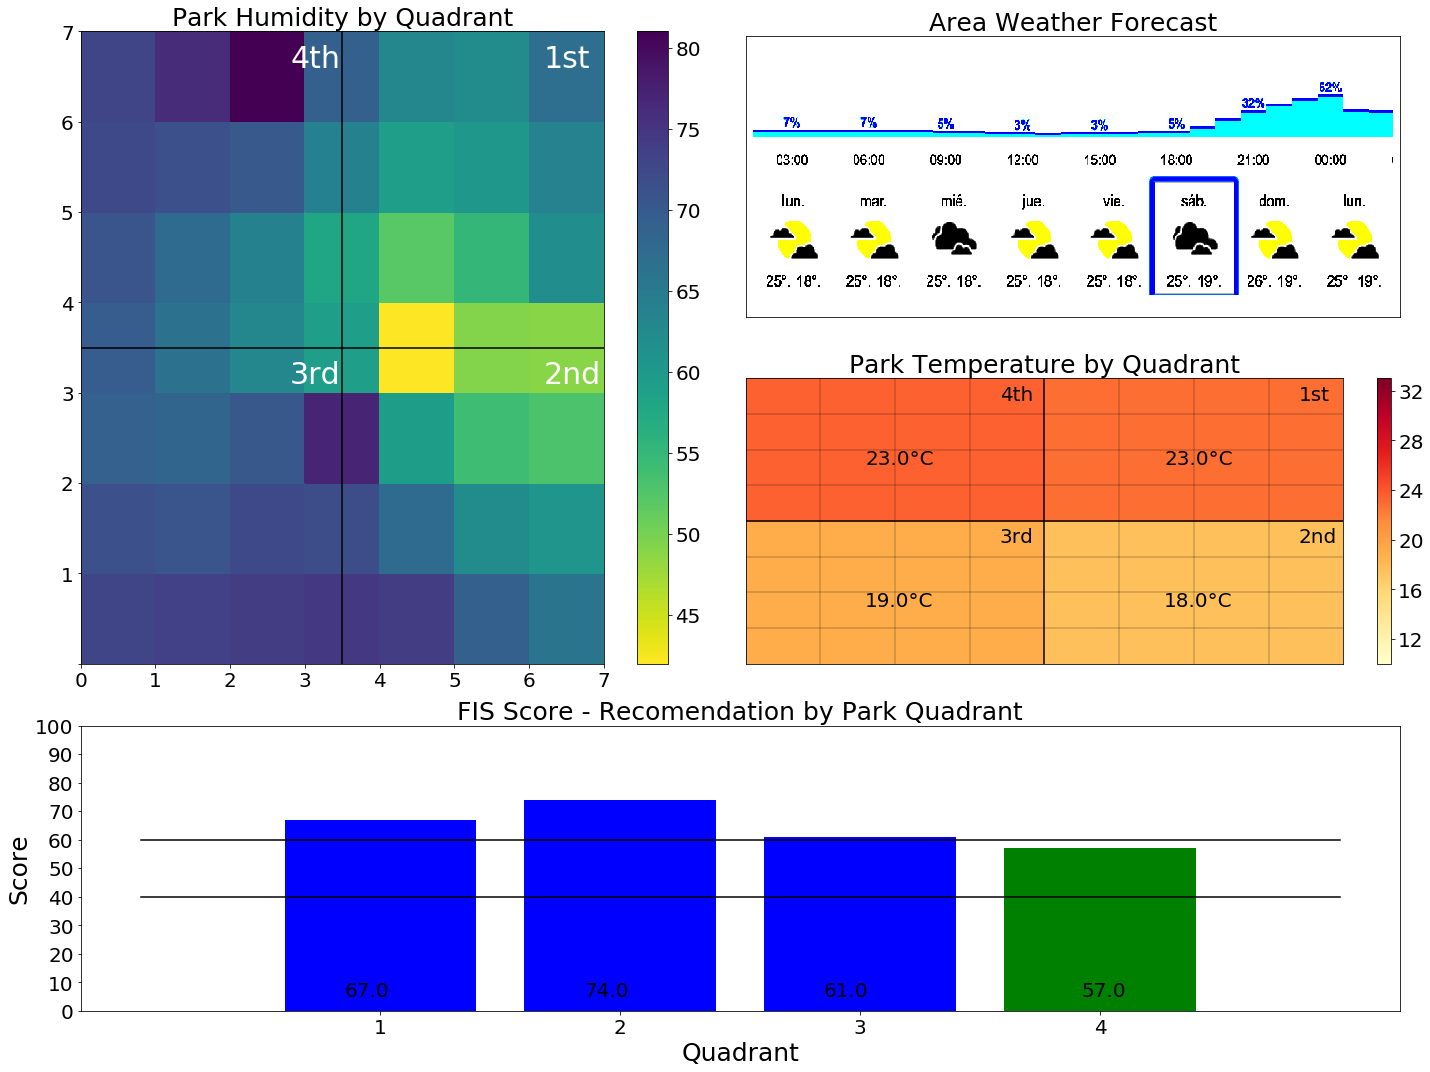

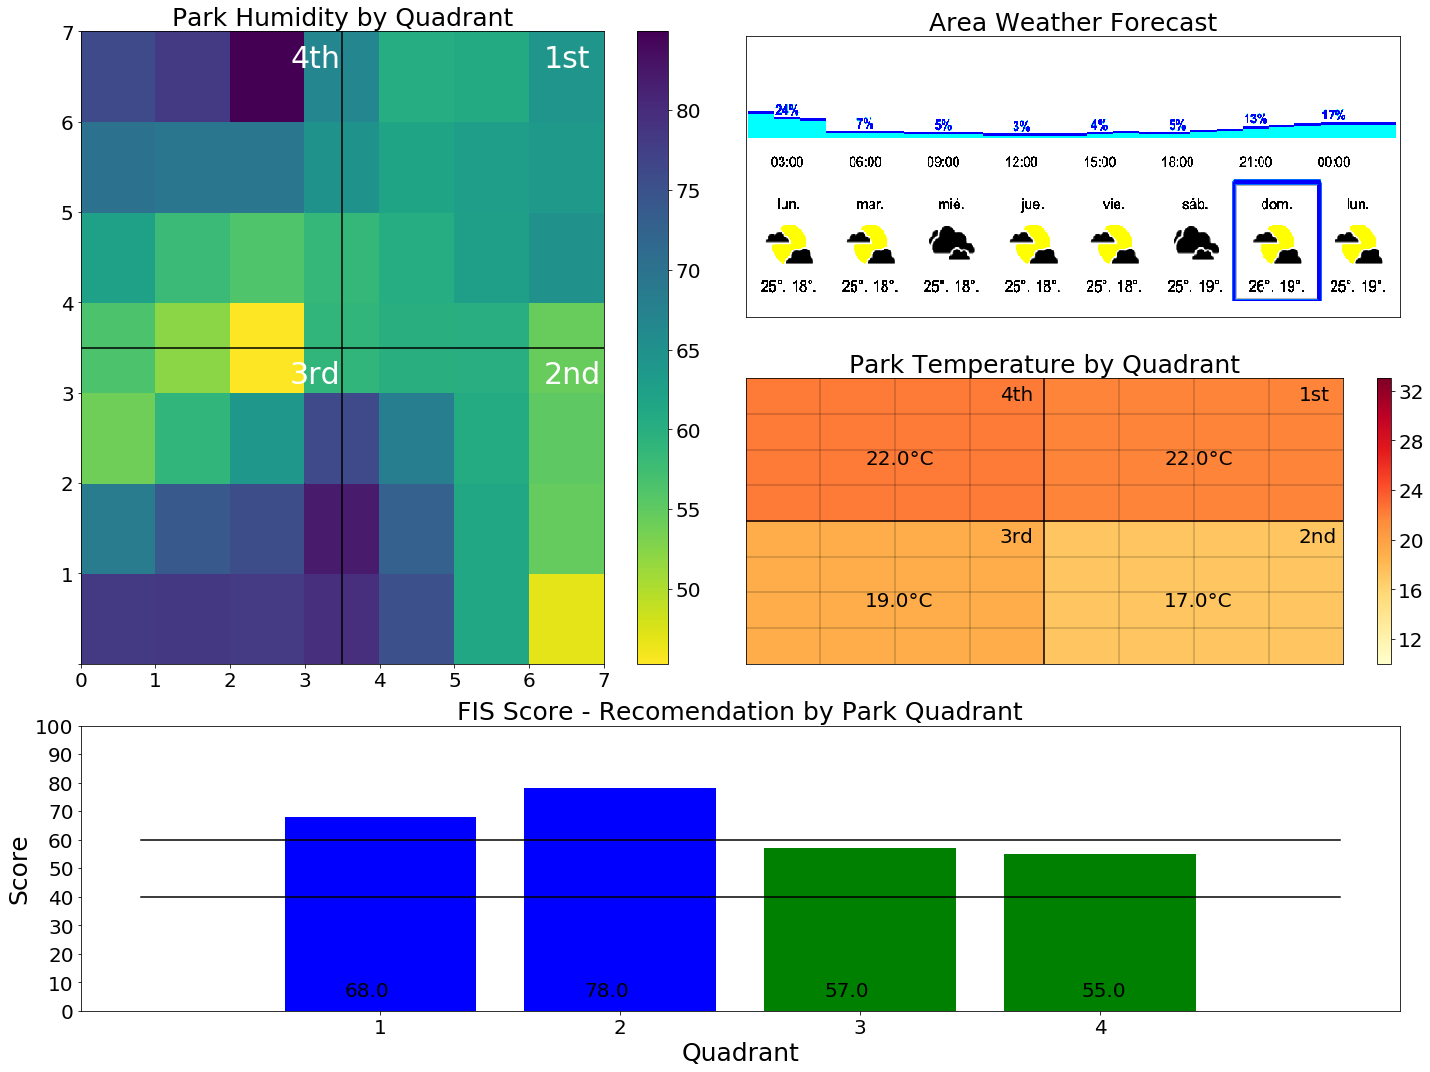

In [73]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grid_y, grid_x = np.mgrid[:7:8j, 0:7:8j] #Grid positions (x, y coordinates)
yi, xi = grid_y.ravel(), grid_x.ravel()

for i, day in enumerate(days):
    z_real = hum_data[day] #Soil moisture values for sample

    stratified_sample = pd.read_csv('output/daily_stratified_sample/stratified_sample_day{}.csv'.format(i+1), header=None)
    stratified_sample_array = stratified_sample.values #array of stratified sample values

    x = stratified_sample_array[:,0] #X position for stratified sample
    y = stratified_sample_array[:,1] #Y position for stratified sample
    z = stratified_sample_array[:,2] #Soil moisture values for stratified sample

    #Exhaustive search for best epsilon parameter in RBF interpolation 
    rbfi = Rbf(x, y, z, function='multiquadric', epsilon=epsilons[i]) #RBF interpolator instance with best epsilon
    zi = rbfi(xi, yi) #Array of interpolated values using the RBF
    
    #Arrays of soil moisture values in grid form for surface plots
    Z_real = z_real.values.reshape(8,8) 
    Zi = zi.reshape(8,8)

    #Generate plots
    #fig1 = surfaces_plot(grid_x, grid_y, Zi, Z_real, dims=3)
    fig2 = dashboard_v2(grid_y, grid_x, Zi, score_dash.loc[:,day], temp_dash.loc[:,day].values.reshape(2,2), weather=i+1)
    plt.savefig('output/images/dashboard/dashboard_day{}.png'.format(i+1), format='png');
    plt.savefig('output/images/dashboard/dashboard_day{}.svg'.format(i+1), format='svg');
    plt.show()